### Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
from tqdm._tqdm_notebook import tqdm_notebook
import itertools
from time import time
import csv

warnings.filterwarnings("ignore")

<ipython-input-2-e77114c5ecb0>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook


### Read Data

In [3]:
data = pd.read_csv('myFitnessPal_parsed.csv')
data.head()

,user_id,date,sequence,food_ids,total_calories,total_carbs,total_fat,total_protein,total_sodium,total_sugar,goal_calories,goal_carbs,goal_fat,goal_protein,goal_sodium,goal_sugar
0,1,2014-09-15,1,"[1, 2, 3, 4, 4]",2430,96,37.0,50.0,855.0,63.0,1572.0,196.0,52.0,79.0,2300.0,59.0
1,1,2014-09-16,1,"[5, 1, 2, 3, 6, 7]",1862,158,54.0,114.0,2215.0,100.0,1832.0,229.0,61.0,92.0,2300.0,69.0
2,1,2014-09-17,1,"[1, 2, 3, 6, 8, 9, 10]",2251,187,60.0,98.0,1765.0,105.0,1685.0,210.0,56.0,85.0,2300.0,63.0
3,1,2014-09-18,1,"[1, 6, 2, 3, 11, 12]",2001,113,81.0,202.0,1101.0,71.0,1597.0,199.0,53.0,80.0,2300.0,60.0
4,1,2014-09-19,1,"[1, 7, 13, 12, 2, 3, 12, 12]",2158,180,89.0,115.0,1998.0,84.0,1589.0,198.0,53.0,80.0,2300.0,60.0


In [4]:
with open('foods.json') as json_file:
     foods = json.load(json_file)

In [5]:
def count_freq(row, n):
    for subset in set(itertools.combinations(row[1:-1].split(', ') , n)):
        if len(set(subset)) == n:
            food_combos[subset] = food_combos.get(subset, 0) + 1

In [6]:
# 4 Meals Combo
start = time()
food_combos = {}
tqdm_notebook.pandas(desc='PROGRESS >>>')
data.food_ids.apply(lambda x: count_freq(x, 4))
temp = sorted(food_combos.items(), key=lambda item: item[1])
temp.reverse()
a = pd.DataFrame(temp[:10], columns = ['Combo', 'Amount'])

a['Meal_1_ID'] = a['Combo'].apply(lambda x: x[0])
a['Meal_1_Name'] = a['Combo'].apply(lambda x: foods[x[0]])

a['Meal_2_ID'] = a['Combo'].apply(lambda x: x[1])
a['Meal_2_Name'] = a['Combo'].apply(lambda x: foods[x[1]])

a['Meal_3_ID'] = a['Combo'].apply(lambda x: x[2])
a['Meal_3_Name'] = a['Combo'].apply(lambda x: foods[x[2]])

a['Meal_4_ID'] = a['Combo'].apply(lambda x: x[3])
a['Meal_4_Name'] = a['Combo'].apply(lambda x: foods[x[3]])

a[['Meal_1_ID','Meal_1_Name','Meal_2_ID','Meal_2_Name','Meal_3_ID','Meal_3_Name','Meal_4_ID','Meal_4_Name','Amount']].to_csv('./4 Meals Combo.csv', index=False)

print(time()-start)
a[['Meal_1_ID','Meal_1_Name','Meal_2_ID','Meal_2_Name','Meal_3_ID','Meal_3_Name','Meal_4_ID','Meal_4_Name','Amount']].head()


41.336530923843384


,Meal_1_ID,Meal_1_Name,Meal_2_ID,Meal_2_Name,Meal_3_ID,Meal_3_Name,Meal_4_ID,Meal_4_Name,Amount
0,19452,Hershey's Kisses - Dark Chocolate,407661,"Generic - Cantelope 6-1/2"" Diameter",150307,Jif - Peanut Butter 1 Tbsp,609679,Schmidt - Old Time Split Top Wheat Bread,172
1,31405,Utz - Pretzels - Honey Wheat Braided Twists,407661,"Generic - Cantelope 6-1/2"" Diameter",150307,Jif - Peanut Butter 1 Tbsp,609679,Schmidt - Old Time Split Top Wheat Bread,172
2,19452,Hershey's Kisses - Dark Chocolate,31405,Utz - Pretzels - Honey Wheat Braided Twists,407661,"Generic - Cantelope 6-1/2"" Diameter",609679,Schmidt - Old Time Split Top Wheat Bread,171
3,19452,Hershey's Kisses - Dark Chocolate,31405,Utz - Pretzels - Honey Wheat Braided Twists,407661,"Generic - Cantelope 6-1/2"" Diameter",150307,Jif - Peanut Butter 1 Tbsp,170
4,19452,Hershey's Kisses - Dark Chocolate,31405,Utz - Pretzels - Honey Wheat Braided Twists,150307,Jif - Peanut Butter 1 Tbsp,609679,Schmidt - Old Time Split Top Wheat Bread,170


In [7]:
# 3 Meals Combo
start = time()
food_combos = {}
tqdm_notebook.pandas(desc='PROGRESS >>>')
data.food_ids.apply(lambda x: count_freq(x, 3))
temp = sorted(food_combos.items(), key=lambda item: item[1])
temp.reverse()
a = pd.DataFrame(temp[:10], columns = ['Combo', 'Amount'])

a['Meal_1_ID'] = a['Combo'].apply(lambda x: x[0])
a['Meal_1_Name'] = a['Combo'].apply(lambda x: foods[x[0]])

a['Meal_2_ID'] = a['Combo'].apply(lambda x: x[1])
a['Meal_2_Name'] = a['Combo'].apply(lambda x: foods[x[1]])

a['Meal_3_ID'] = a['Combo'].apply(lambda x: x[2])
a['Meal_3_Name'] = a['Combo'].apply(lambda x: foods[x[2]])

a[['Meal_1_ID','Meal_1_Name','Meal_2_ID','Meal_2_Name','Meal_3_ID','Meal_3_Name','Amount']].to_csv('./3 Meals Combo.csv', index=False)

print(time()-start)
a[['Meal_1_ID','Meal_1_Name','Meal_2_ID','Meal_2_Name','Meal_3_ID','Meal_3_Name','Amount']].head()


28.04703712463379


,Meal_1_ID,Meal_1_Name,Meal_2_ID,Meal_2_Name,Meal_3_ID,Meal_3_Name,Amount
0,341121,Saba - Vanilla Topfast,346138,Dean's - 2% Reduced Fat Milk,346137,Skippy® - Creamy Peanut Butter,343
1,210983,Scivation - Xtend New Formula - Grape Escape,210986,Wrigley's Spearmint - Gum,210988,Beverly International Nutrition - Glutamine Se...,308
2,617290,My Homemade Chicken Breast 1.5oz,617291,Great Value (Walmart) - Colby & Monterey Jack ...,359448,Frito Lays Sunchips - Harvest Cheddar,259
3,37419,Jamieson - Vitamin C - Chewable,37418,Generic - Water,37421,Pc Organics - Fair Trade Dark Roast Whole Bean...,228
4,37419,Jamieson - Vitamin C - Chewable,37412,Now - Glucosamine & Chondroitin With Msm,37418,Generic - Water,223


### Which foods are eaten most often in a month

In [8]:
def add_elem_dict(all_names,lst):
    for food_id in lst[1:-1].split(","):
        food_id = food_id.replace(' ','')
        all_names[food_id] = all_names.get(food_id,0)+1
        
def get_top_food_ids(df,top_numbers):
    all_names = {}
    df["food_ids"].apply(lambda lst: add_elem_dict(all_names,lst))
    top_food_ids = list(sorted(all_names.items(), key=lambda item: item[1]))
    top_food_ids = [key for key,value in top_food_ids]
    top_food_ids.reverse()
    return top_food_ids[:10]

In [9]:
data["month"] = data["date"].apply(lambda date: date[:7])

max_food_in_month = data.groupby(['month']).apply(lambda x: get_top_food_ids(x,10))

In [10]:
top_food_dataframe = pd.DataFrame(max_food_in_month)

top_food_dataframe = top_food_dataframe.apply(lambda x: x[0], axis = 1, result_type ='expand').reset_index()
top_food_dataframe.columns = ["month","meal_1","meal_2","meal_3","meal_4","meal_5","meal_6","meal_7","meal_8","meal_9","meal_10"]

In [11]:
# თუ უკეთ იცი დაწერა დაწერე 
top_food_dataframe["meal_1"] = top_food_dataframe["meal_1"].apply(lambda food_id: foods[str(food_id)])
top_food_dataframe["meal_2"] = top_food_dataframe["meal_2"].apply(lambda food_id: foods[str(food_id)])
top_food_dataframe["meal_3"] = top_food_dataframe["meal_3"].apply(lambda food_id: foods[str(food_id)])
top_food_dataframe["meal_4"] = top_food_dataframe["meal_4"].apply(lambda food_id: foods[str(food_id)])
top_food_dataframe["meal_5"] = top_food_dataframe["meal_5"].apply(lambda food_id: foods[str(food_id)])
top_food_dataframe["meal_6"] = top_food_dataframe["meal_6"].apply(lambda food_id: foods[str(food_id)])
top_food_dataframe["meal_7"] = top_food_dataframe["meal_7"].apply(lambda food_id: foods[str(food_id)])
top_food_dataframe["meal_8"] = top_food_dataframe["meal_8"].apply(lambda food_id: foods[str(food_id)])
top_food_dataframe["meal_9"] = top_food_dataframe["meal_9"].apply(lambda food_id: foods[str(food_id)])
top_food_dataframe["meal_10"] = top_food_dataframe["meal_10"].apply(lambda food_id: foods[str(food_id)])

In [12]:
top_food_dataframe

,month,meal_1,meal_2,meal_3,meal_4,meal_5,meal_6,meal_7,meal_8,meal_9,meal_10
0,2014-09,Coffee - Brewed from grounds,Quick Added Calories,Bananas - Raw,Spinach - Raw,Cucumber - With peel,Apples - Raw,Oil - Olive,Butter - Salted,Carrots - Raw,Strawberries - Raw
1,2014-10,Coffee - Brewed from grounds,Quick Added Calories,Bananas - Raw,Apples - Raw,Spinach - Raw,Oil - Olive,Butter - Salted,Cucumber - With peel,Carrots - Raw,Peppers - Sweet
2,2014-11,Coffee - Brewed from grounds,Quick Added Calories,Bananas - Raw,Apples - Raw,Spinach - Raw,Butter - Salted,Carrots - Raw,Cucumber - With peel,Oil - Olive,Chicken - Breast
3,2014-12,Coffee - Brewed from grounds,Quick Added Calories,Bananas - Raw,Spinach - Raw,Apples - Raw,Butter - Salted,Cucumber - With peel,Carrots - Raw,Eggs - Fried (whole egg),Chicken - Breast
4,2015-01,Coffee - Brewed from grounds,Quick Added Calories,Bananas - Raw,Spinach - Raw,Butter - Salted,Apples - Raw,Strawberries - Raw,Blueberries - Raw,Cucumber - With peel,Carrots - Raw
5,2015-02,Coffee - Brewed from grounds,Quick Added Calories,Bananas - Raw,Spinach - Raw,Strawberries - Raw,Blueberries - Raw,Butter - Salted,Apples - Raw,Cucumber - With peel,Carrots - Raw
6,2015-03,Coffee - Brewed from grounds,Quick Added Calories,Bananas - Raw,Strawberries - Raw,Spinach - Raw,Butter - Salted,Apples - Raw,Chicken - Breast,Cucumber - With peel,Blueberries - Raw
7,2015-04,Coffee - Brewed from grounds,Quick Added Calories,Strawberries - Raw,Bananas - Raw,Apples - Raw,Spinach - Raw,Chicken - Breast,Carrots - Raw,Blueberries - Raw,Butter - Salted


### Square Root Residuals of calories mismatch between goal and actual

In [13]:
data['SquareRootResiduals'] = (data['total_calories']-data['goal_calories']).apply(lambda x: np.sqrt(x**2))
data.head()

,user_id,date,sequence,food_ids,total_calories,total_carbs,total_fat,total_protein,total_sodium,total_sugar,goal_calories,goal_carbs,goal_fat,goal_protein,goal_sodium,goal_sugar,month,SquareRootResiduals
0,1,2014-09-15,1,"[1, 2, 3, 4, 4]",2430,96,37.0,50.0,855.0,63.0,1572.0,196.0,52.0,79.0,2300.0,59.0,2014-09,858.0
1,1,2014-09-16,1,"[5, 1, 2, 3, 6, 7]",1862,158,54.0,114.0,2215.0,100.0,1832.0,229.0,61.0,92.0,2300.0,69.0,2014-09,30.0
2,1,2014-09-17,1,"[1, 2, 3, 6, 8, 9, 10]",2251,187,60.0,98.0,1765.0,105.0,1685.0,210.0,56.0,85.0,2300.0,63.0,2014-09,566.0
3,1,2014-09-18,1,"[1, 6, 2, 3, 11, 12]",2001,113,81.0,202.0,1101.0,71.0,1597.0,199.0,53.0,80.0,2300.0,60.0,2014-09,404.0
4,1,2014-09-19,1,"[1, 7, 13, 12, 2, 3, 12, 12]",2158,180,89.0,115.0,1998.0,84.0,1589.0,198.0,53.0,80.0,2300.0,60.0,2014-09,569.0


### Find applicants who have SquareRootResiduals greater than threshold and plot without them

In [14]:
data_unique_ID_date = data.drop_duplicates(subset=['user_id', 'date'])
SquareRootResiduals_threshold = 10_000
applicants_with_high_SquareRootResiduals = data_unique_ID_date[data_unique_ID_date["SquareRootResiduals"]>=SquareRootResiduals_threshold]

applicants_with_high_SquareRootResiduals.sort_values(by='SquareRootResiduals', ascending=False).head()

,user_id,date,sequence,food_ids,total_calories,total_carbs,total_fat,total_protein,total_sodium,total_sugar,goal_calories,goal_carbs,goal_fat,goal_protein,goal_sodium,goal_sugar,month,SquareRootResiduals
1471217,7046,2015-01-30,2,[14816],1200800,0,132088.0,0.0,0.0,0.0,1300.0,65.0,72.0,97.0,100.0,25.0,2015-01,1199500.0
1233620,5883,2015-01-21,1,"[332766, 454337]",840366,210865,848.0,8455.0,420076.0,168015.0,7265.0,908.0,242.0,364.0,2300.0,273.0,2015-01,833101.0
1358428,6482,2014-10-18,1,[3947],530000,47000,3000.0,9000.0,960000.0,1650.0,227.0,25.0,62.0,2300.0,NaN,NaN,2014-10,529773.0
592475,2873,2014-10-28,1,"[81389, 275187, 191996, 72107, 25452, 187263, ...",386977,140,28.0,217.0,532.0,2789.0,1761.0,176.0,25.0,132.0,3500.0,2300.0,2014-10,385216.0
1946719,9267,2014-12-26,1,[541240],300000,30000,30000.0,30000.0,0.0,3000.0,3400.0,473.0,84.0,188.0,150.0,50.0,2014-12,296600.0


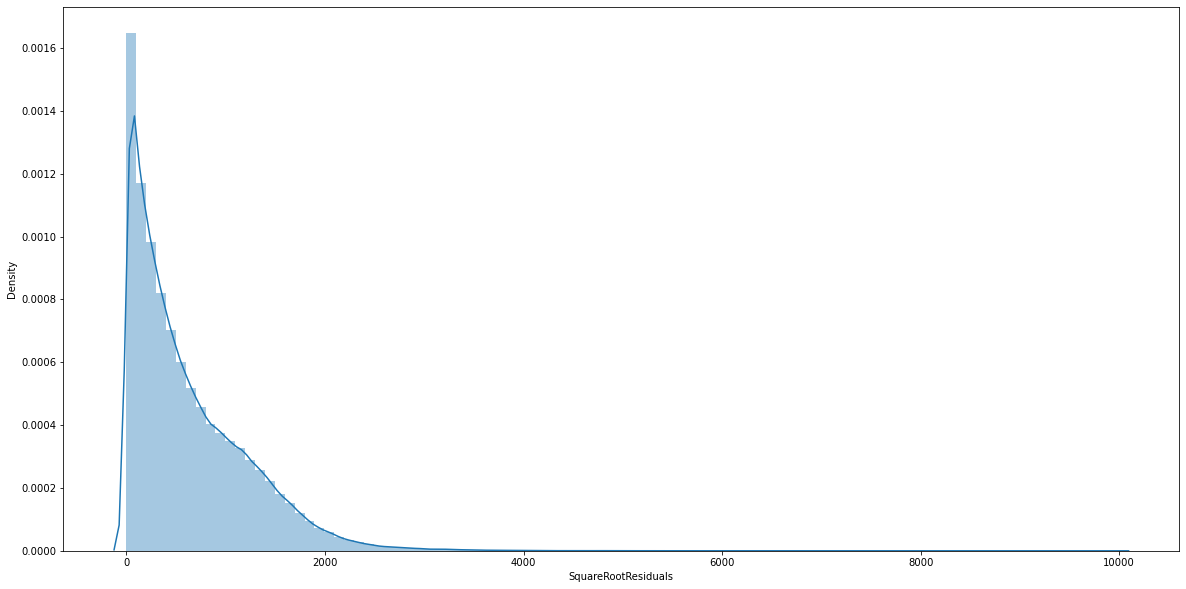

In [15]:
fig, ax =plt.subplots(1,1,figsize=(20,10))

sns.distplot(data_unique_ID_date[data_unique_ID_date["SquareRootResiduals"]<SquareRootResiduals_threshold]["SquareRootResiduals"], bins=100, ax=ax)

fig.show()

### Find top users

In [16]:
user_tenure = data['user_id'].value_counts().to_frame().reset_index()
user_tenure.columns = ['user_id', 'Amount']

top_users = pd.merge(data,user_tenure.head(1000),on='user_id', how='inner')
top_users.head()

,user_id,date,sequence,food_ids,total_calories,total_carbs,total_fat,total_protein,total_sodium,total_sugar,goal_calories,goal_carbs,goal_fat,goal_protein,goal_sodium,goal_sugar,month,SquareRootResiduals,Amount
0,5,2014-09-14,1,"[532, 533, 534, 535, 536, 537, 538, 539]",3405,114,32.0,107.0,1422.0,63.0,4214.0,263.0,53.0,158.0,2300.0,118.0,2014-09,809.0,701
1,5,2014-09-14,2,"[540, 541, 542, 543, 544]",3405,114,32.0,107.0,1422.0,63.0,4214.0,263.0,53.0,158.0,2300.0,118.0,2014-09,809.0,701
2,5,2014-09-14,3,"[545, 4, 546]",3405,114,32.0,107.0,1422.0,63.0,4214.0,263.0,53.0,158.0,2300.0,118.0,2014-09,809.0,701
3,5,2014-09-14,4,[547],3405,114,32.0,107.0,1422.0,63.0,4214.0,263.0,53.0,158.0,2300.0,118.0,2014-09,809.0,701
4,5,2014-09-15,1,"[534, 533, 532, 538, 537, 536, 535, 538, 539]",4127,204,44.0,188.0,1962.0,96.0,3385.0,211.0,43.0,127.0,2300.0,94.0,2014-09,742.0,701


In [17]:
def enum_date(UserID):
    global user_id, indx
    if UserID != user_id:
        user_id = UserID
        indx = 0
    
    indx += 1
    return indx

In [18]:
user_id = 1
indx = 0

top_users['eating_enum'] = top_users['user_id'].apply(lambda x: enum_date(x))

In [19]:
avg = top_users.groupby(['user_id']).apply(lambda x: len(x))

avg.sum()/len(avg)

693.637

### Plot Nutritient separately

In [20]:
def plot_nutrient(df,nutrient_name,goal_nutrient_name,thr1,thr2):
    avg_nutrient = df.groupby(['user_id']).apply(lambda x: x[nutrient_name].sum()/len(x)).reset_index()
    goal_avg_nutrient = df.groupby(['user_id']).apply(lambda x: x[goal_nutrient_name].sum()/len(x)).reset_index()
    avg_nutrient.columns = ["user_id", "average_nutrient_calories"]
    goal_avg_nutrient.columns = ["user_id", "goal_average_nutrient_calories"]
    
    fig, ax =plt.subplots(2,3,figsize=(26,10))

    sns.distplot(avg_nutrient[avg_nutrient['average_nutrient_calories'] < thr1]['average_nutrient_calories'], ax=ax[0][0]).set_title("Lower risk")
    sns.distplot(avg_nutrient['average_nutrient_calories'], ax=ax[0][1]).set_title("General")
    sns.distplot(avg_nutrient[avg_nutrient['average_nutrient_calories'] > thr2]['average_nutrient_calories'], ax=ax[0][2]).set_title("Above risk")
    
    sns.distplot(goal_avg_nutrient[goal_avg_nutrient['goal_average_nutrient_calories'] < thr1]['goal_average_nutrient_calories'], ax=ax[1][0])
    sns.distplot(goal_avg_nutrient['goal_average_nutrient_calories'], ax=ax[1][1])
    sns.distplot(goal_avg_nutrient[goal_avg_nutrient['goal_average_nutrient_calories'] > thr2]['goal_average_nutrient_calories'], ax=ax[1][2])
    
    fig.show()
    
    under_minimum = len(avg_nutrient[avg_nutrient['average_nutrient_calories'] < thr1])
    above_minimum = len(avg_nutrient[avg_nutrient['average_nutrient_calories'] > thr2])
    total = avg_nutrient.user_id.nunique()

    print(f'\nlower risk group: {100*under_minimum/total} %')
    print(f'above risk group: {100*above_minimum/total} %')
    print(f'not   risk group: {100*(1-(under_minimum+above_minimum)/total)} %\n')


lower risk group: 3.8 %
above risk group: 2.2 %
not   risk group: 94.0 %



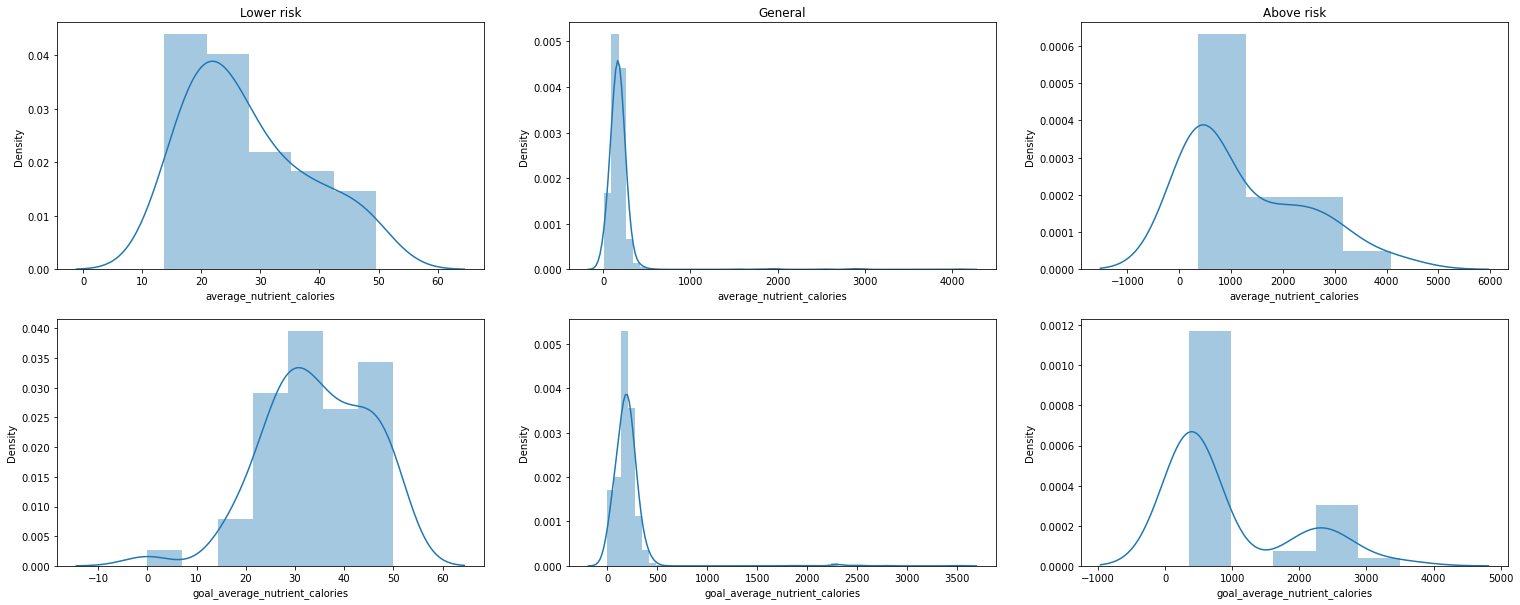

In [22]:
plot_nutrient(top_users,"total_carbs","goal_carbs",50,350)


lower risk group: 29.2 %
above risk group: 0.8 %
not   risk group: 70.0 %



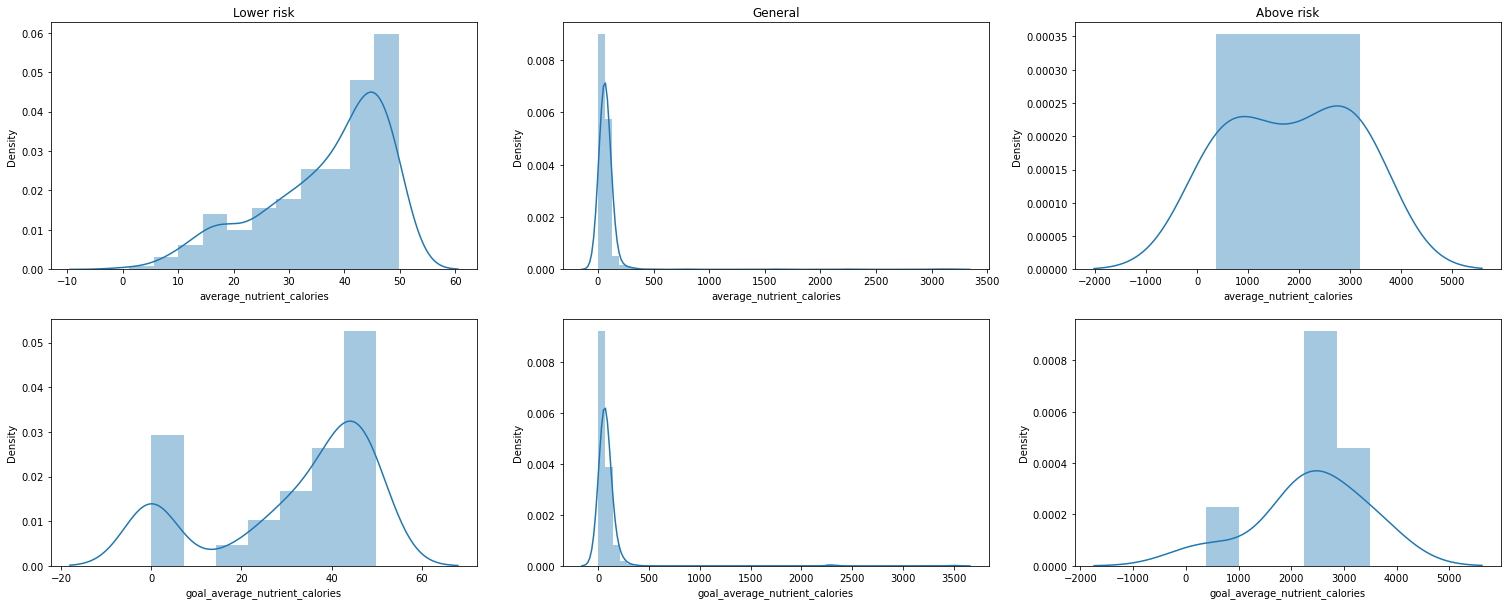

In [105]:
plot_nutrient(top_users,"total_fat","goal_fat",50,350)


lower risk group: 7.5 %
above risk group: 1.6 %
not   risk group: 90.9 %



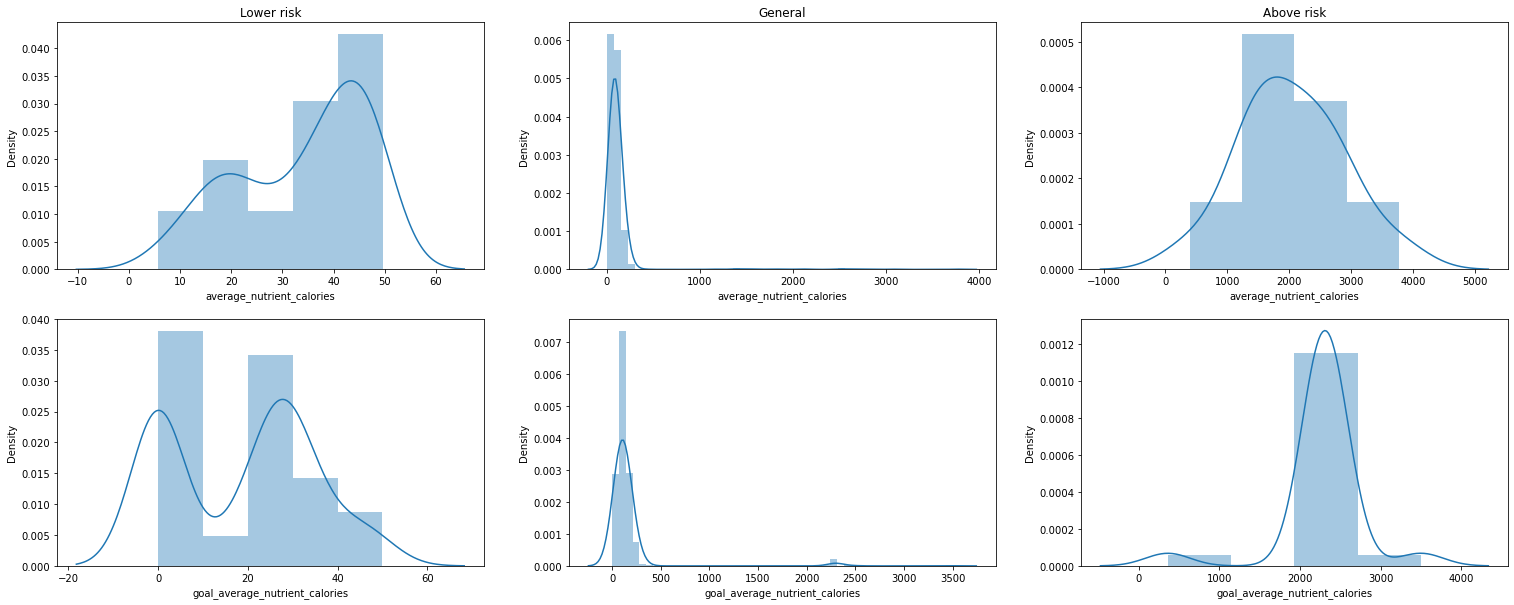

In [106]:
plot_nutrient(top_users,"total_protein","goal_protein",50,350)


lower risk group: 32.0 %
above risk group: 51.0 %
not   risk group: 17.000000000000004 %



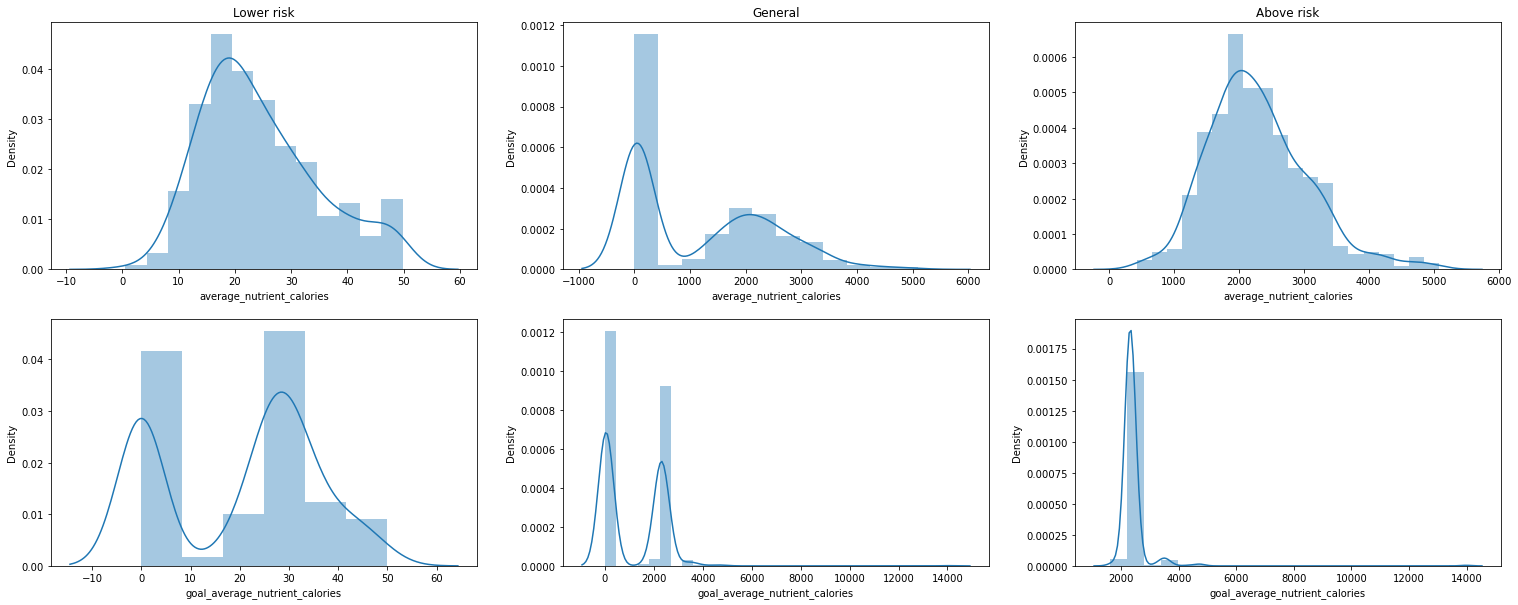

In [107]:
plot_nutrient(top_users,"total_sodium","goal_sodium",50,350)


lower risk group: 35.1 %
above risk group: 24.3 %
not   risk group: 40.6 %



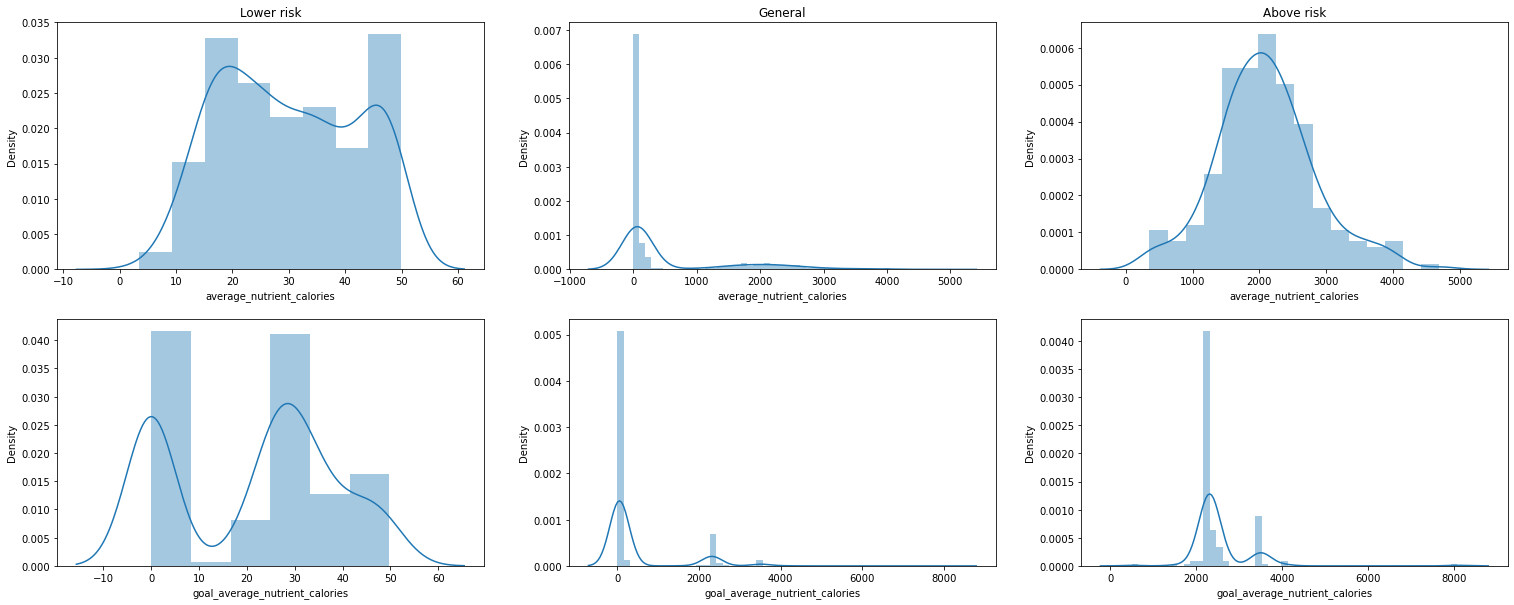

In [108]:
plot_nutrient(top_users,"total_sugar","goal_sugar",50,350)